<a href="https://colab.research.google.com/github/dhinakaran007/Time-Series-Analysis-using-LSTM/blob/main/Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install alpha_vantage yfinance pandas matplotlib statsmodels scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from alpha_vantage.timeseries import TimeSeries
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# api key:
# XYZJCBHG02E4LC20

In [3]:
api_key = "XYZJCBHG02E4LC20"

ts = TimeSeries(key=api_key, output_format='pandas')

def get_stock_data(ticker):
  data, meta_data = ts.get_daily(symbol=ticker, outputsize='full')
  return data

ticker = "AAPL"
data = get_stock_data(ticker)
print(data.head())

            1. open  2. high  3. low  4. close   5. volume
date                                                      
2024-11-19   226.98   230.16  226.66    228.28  36211774.0
2024-11-18   225.25   229.74  225.17    228.02  44686020.0
2024-11-15   226.40   226.92  224.27    225.00  47923696.0
2024-11-14   225.02   228.87  225.00    228.22  44923941.0
2024-11-13   224.01   226.65  222.76    225.12  48566217.0


In [8]:
data.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

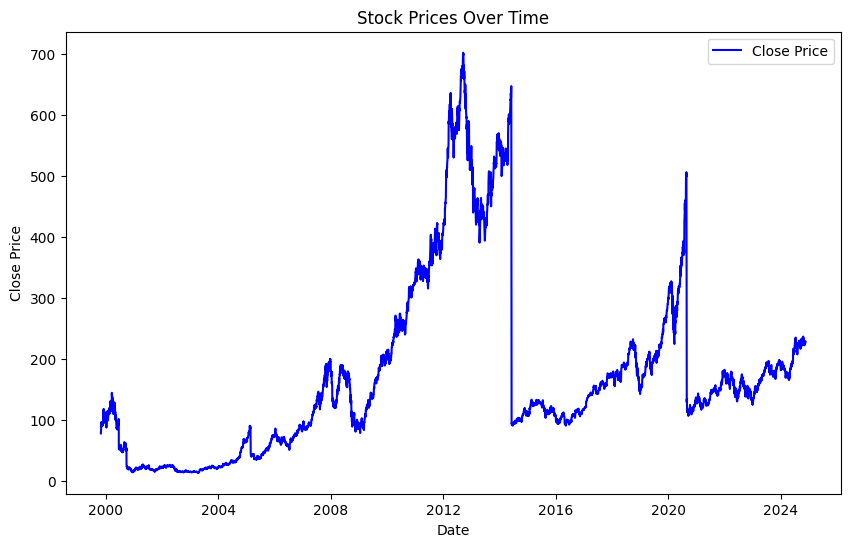

In [9]:
def plot_stock_prices(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['4. close'], label='Close Price', color='blue')
    plt.title('Stock Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Call the function
plot_stock_prices(data)

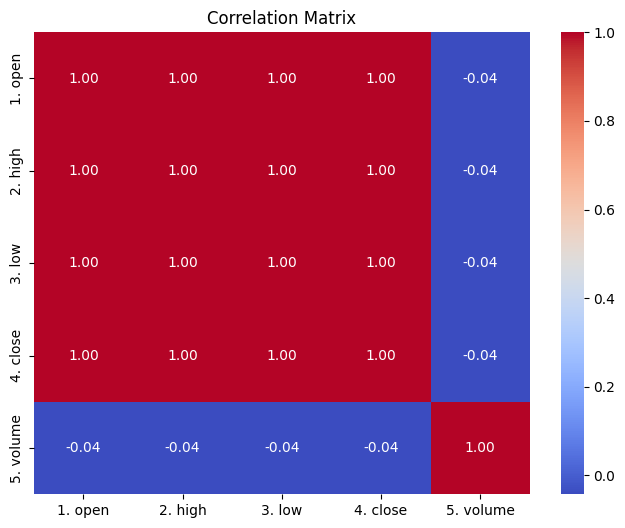

In [12]:
import seaborn as sns

def plot_correlation_matrix(data):
    corr = data[['1. open', '2. high', '3. low', '4. close', '5. volume']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(data)


In [13]:
data.rename(columns={'1. open':'open', '2. high':'high', '3. low':'low', '4. close':'close', '5. volume':'volume'}, inplace=True)

In [14]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label="Actual Prices", color='blue')
    plt.plot(y_pred, label="Predicted Prices", color='red')
    plt.title("Actual vs. Predicted Stock Prices")
    plt.xlabel("Index")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

plot_predictions(y_test, y_pred)


# **Model Train**

In [16]:
features = data[['open', 'high', 'low', 'volume']].values
target = data['close'].values

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [18]:
! pip install tensorflow

In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 53484.5664
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48720.0938
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 46412.5586
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 40784.5391
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 40169.2188
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 38637.6953
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 35788.6562
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 36605.6602
Epoch 9/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 36878.8867
Epoch 10/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32689.1172
Epoch 11/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 32657.3145
Epoch 12/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31878.5020
Epoch 13/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 29242.9453
Epoch 14/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 28119.5098
E

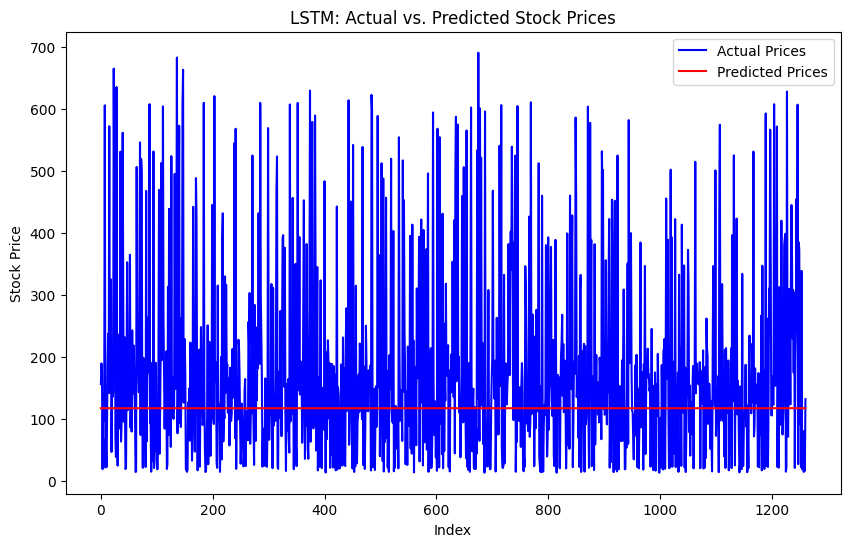

In [20]:
import matplotlib.pyplot as plt

def plot_lstm_predictions(y_test, y_pred):
    # Flatten the predictions if necessary
    y_pred = y_pred.flatten()

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label="Actual Prices", color="blue")
    plt.plot(y_pred, label="Predicted Prices", color="red")
    plt.title("LSTM: Actual vs. Predicted Stock Prices")
    plt.xlabel("Index")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

# Call the function after prediction
plot_lstm_predictions(y_test, y_pred)